# **Churn Prediction using Logisitic Regression**

# **Data Dictionary**

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

## **Demographic information about customers**

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


# **Customer Bank Relationship**


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


## **Transactional Information**

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

# <b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


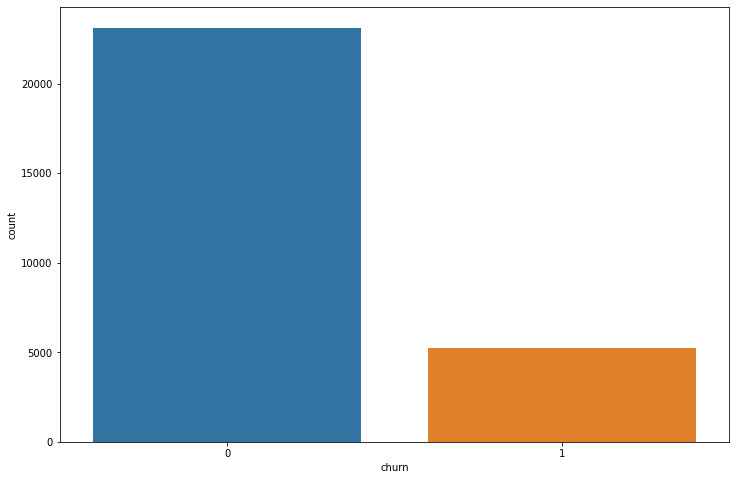

In [ ]:
# visualualisation graphique de la répartition
plt.figure(figsize=(12,8))
sns.countplot(df['churn'])

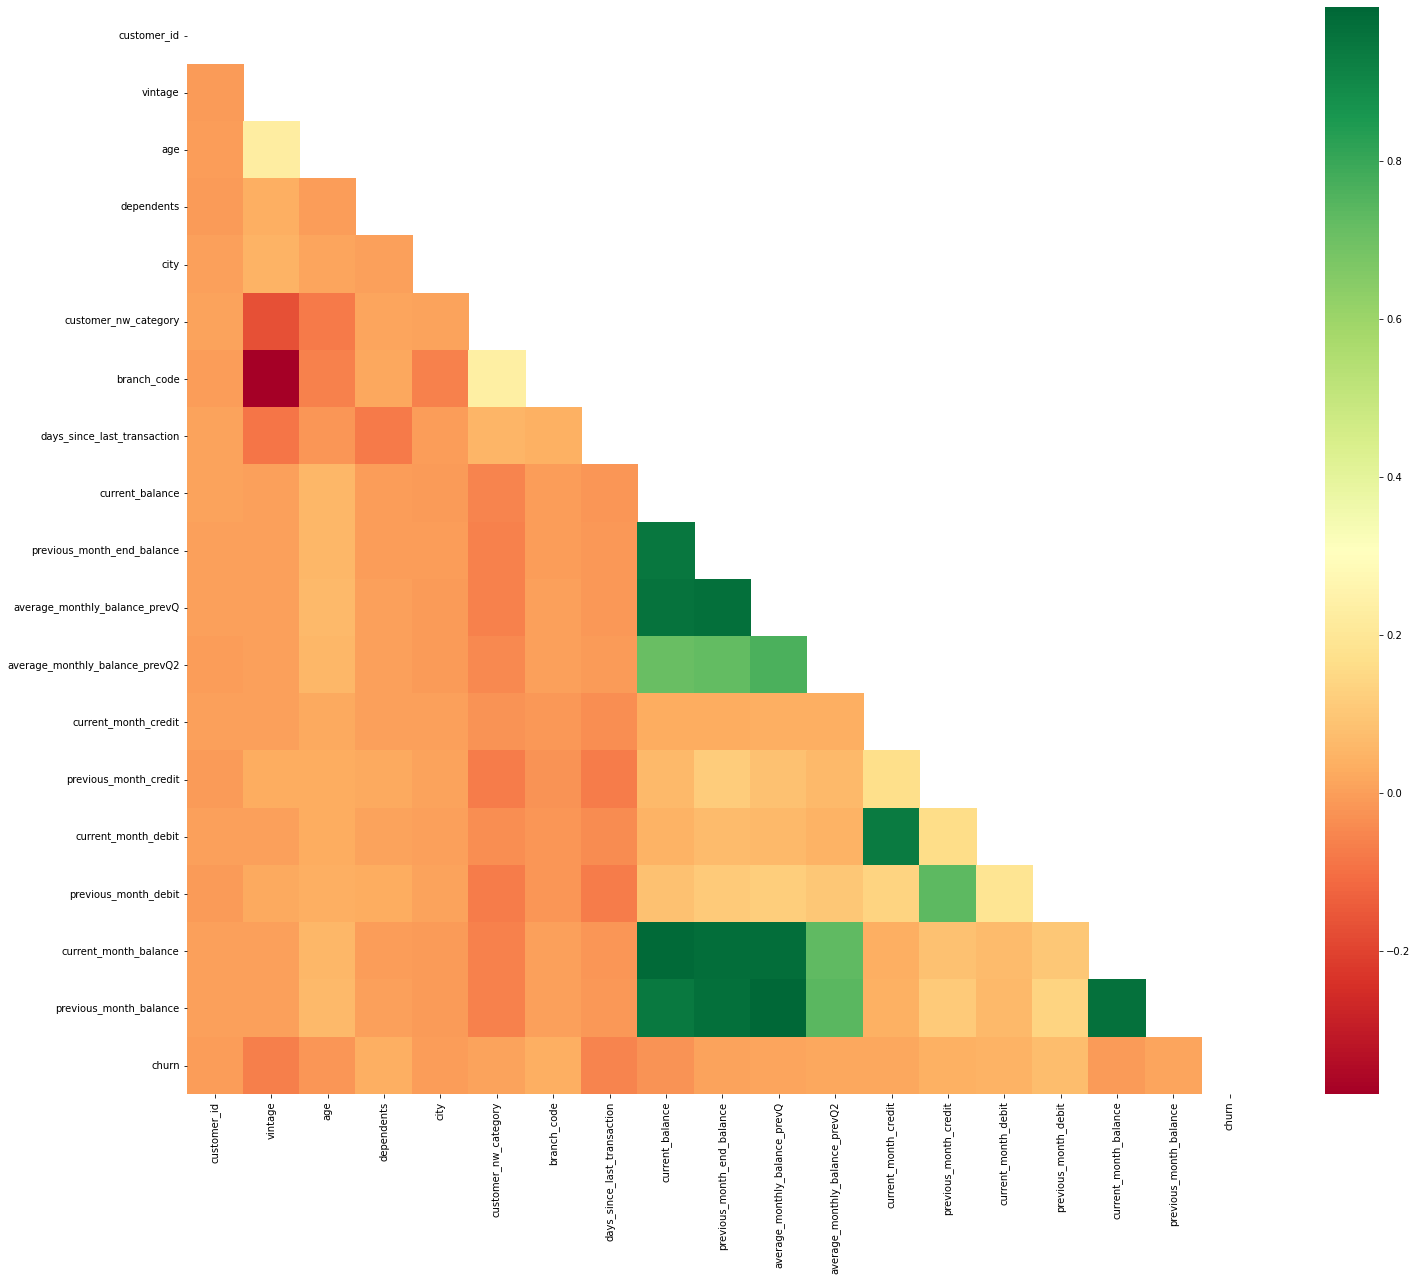

In [ ]:
# screening des variables restantes au travers d'une étude de corrélation sous forme graphique
#Using Pearson Correlation
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

<Figure size 1296x1008 with 0 Axes>

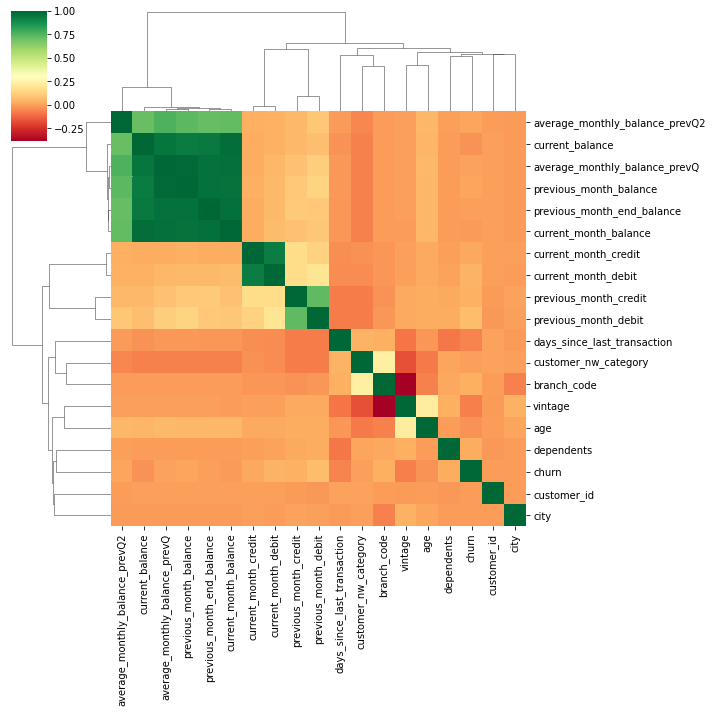

In [ ]:
plt.figure(figsize=(18,14))
sns.clustermap(df.corr(), annot=False, cmap="RdYlGn")
plt.show();

In [ ]:
# Analyse croisée complémentaire des zones à correlations significatives (>0.5), montrant les mêmes tendances que les graphiques ci avant
# corr matrix pour la famille des données d'emprunts (trèes fortes corrélations)
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor_stack = cor.stack()
print("Columns with corr. greater than 0.5 ")
print(cor_stack[(cor_stack > 0.50) ])

Columns with corr. greater than 0.5 
previous_month_end_balance      current_balance                   0.947276
average_monthly_balance_prevQ   current_balance                   0.958307
                                previous_month_end_balance        0.970530
average_monthly_balance_prevQ2  current_balance                   0.714600
                                previous_month_end_balance        0.722998
                                average_monthly_balance_prevQ     0.763495
current_month_debit             current_month_credit              0.937021
previous_month_debit            previous_month_credit             0.733953
current_month_balance           current_balance                   0.983412
                                previous_month_end_balance        0.974714
                                average_monthly_balance_prevQ     0.976290
                                average_monthly_balance_prevQ2    0.725826
previous_month_balance          current_balance                

In [ ]:
# Données de correlations versus la variable cible 'churn'
df[df.columns[:]].corr()['churn'][:-1].sort_values(ascending = False)

previous_month_debit              0.073058
current_month_debit               0.048041
previous_month_credit             0.042179
branch_code                       0.035469
dependents                        0.033487
current_month_credit              0.020755
average_monthly_balance_prevQ2    0.018376
previous_month_balance            0.014593
average_monthly_balance_prevQ     0.011960
previous_month_end_balance        0.006886
customer_nw_category              0.006551
city                             -0.001585
customer_id                      -0.002723
current_month_balance            -0.006391
age                              -0.020012
current_balance                  -0.024181
days_since_last_transaction      -0.055830
vintage                          -0.064637
Name: churn, dtype: float64

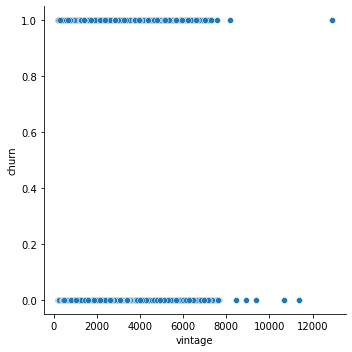

In [ ]:
sns.relplot(x= df['vintage'],y = df['churn'])

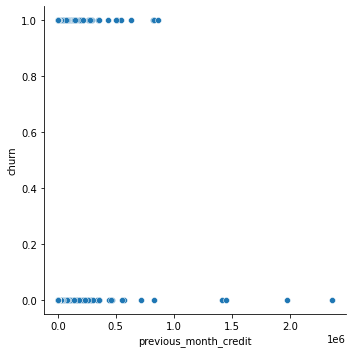

In [ ]:
sns.relplot(x= df['previous_month_credit'],y = df['churn'])

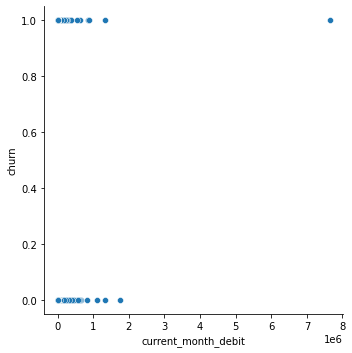

In [ ]:
sns.relplot(x= df['current_month_debit'],y = df['churn'])

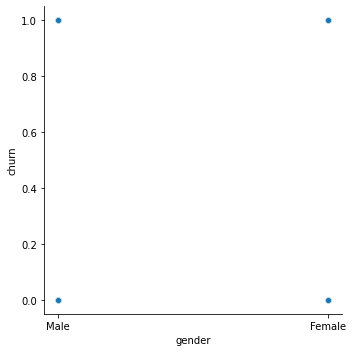

In [ ]:
sns.relplot(x= df['gender'],y = df['churn'])

In [ ]:
# ANALYSE DES VARIABLES QUALITATIVES
for col in df.select_dtypes('object'):
    print(f'{col :-<30} {df[col].unique()}','\n \n')

gender------------------------ ['Male' nan 'Female'] 
 

occupation-------------------- ['self_employed' 'salaried' 'retired' 'student' nan 'company'] 
 



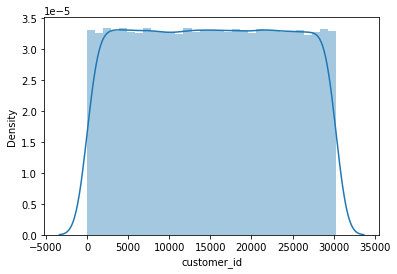

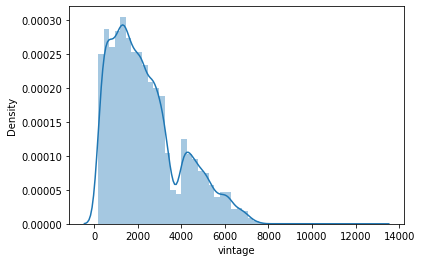

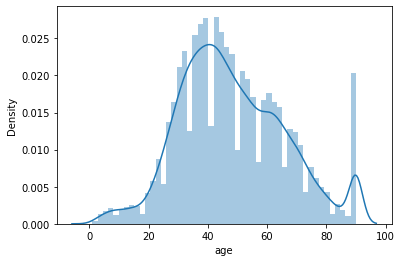

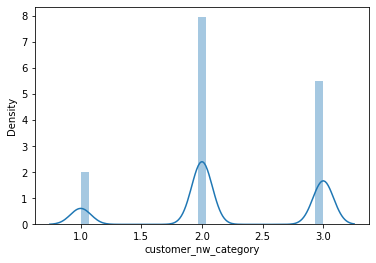

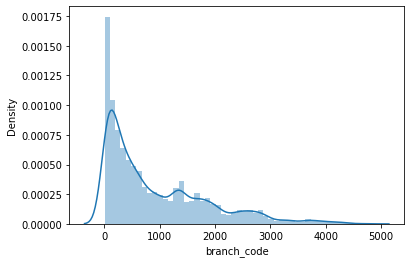

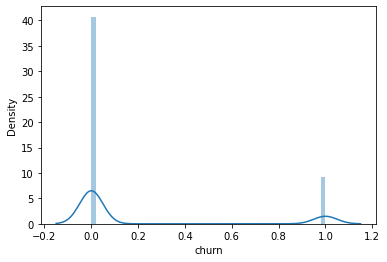

In [ ]:
# HISTOGRAMMES DES VARIABLES CONTINUES:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col])

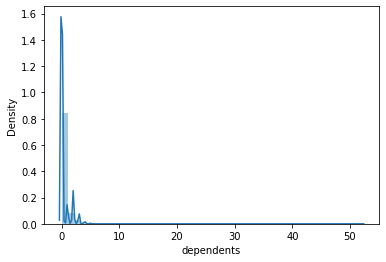

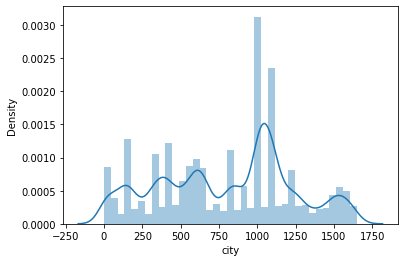

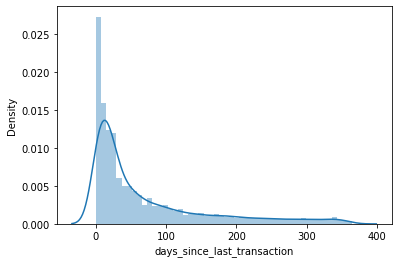

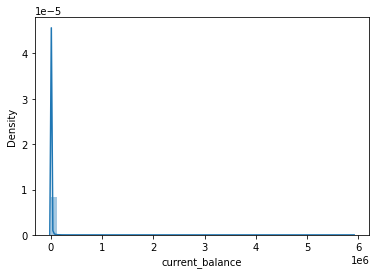

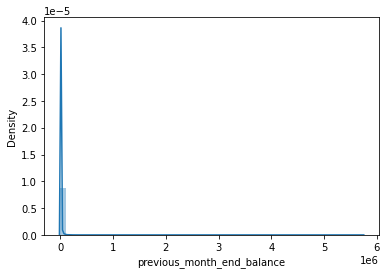

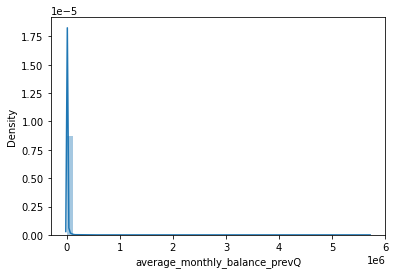

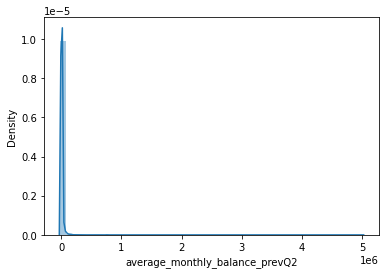

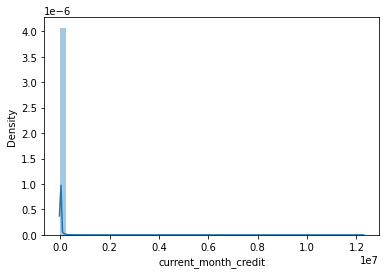

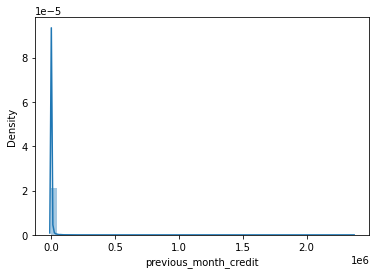

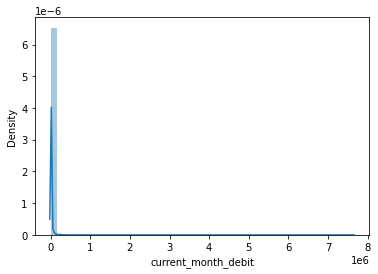

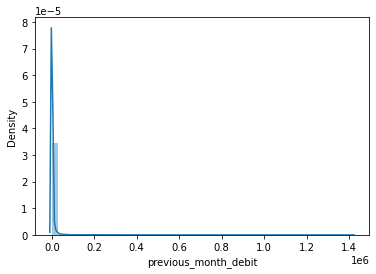

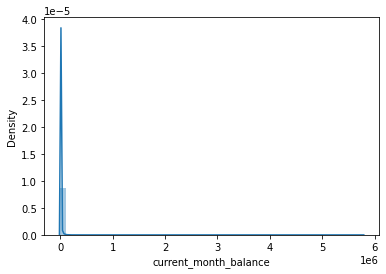

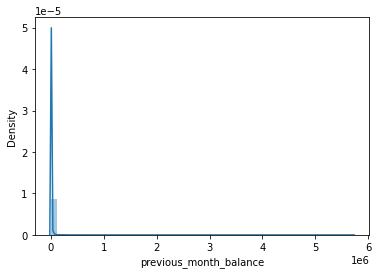

In [ ]:
# HISTOGRAMMES DES VARIABLES CONTINUES:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

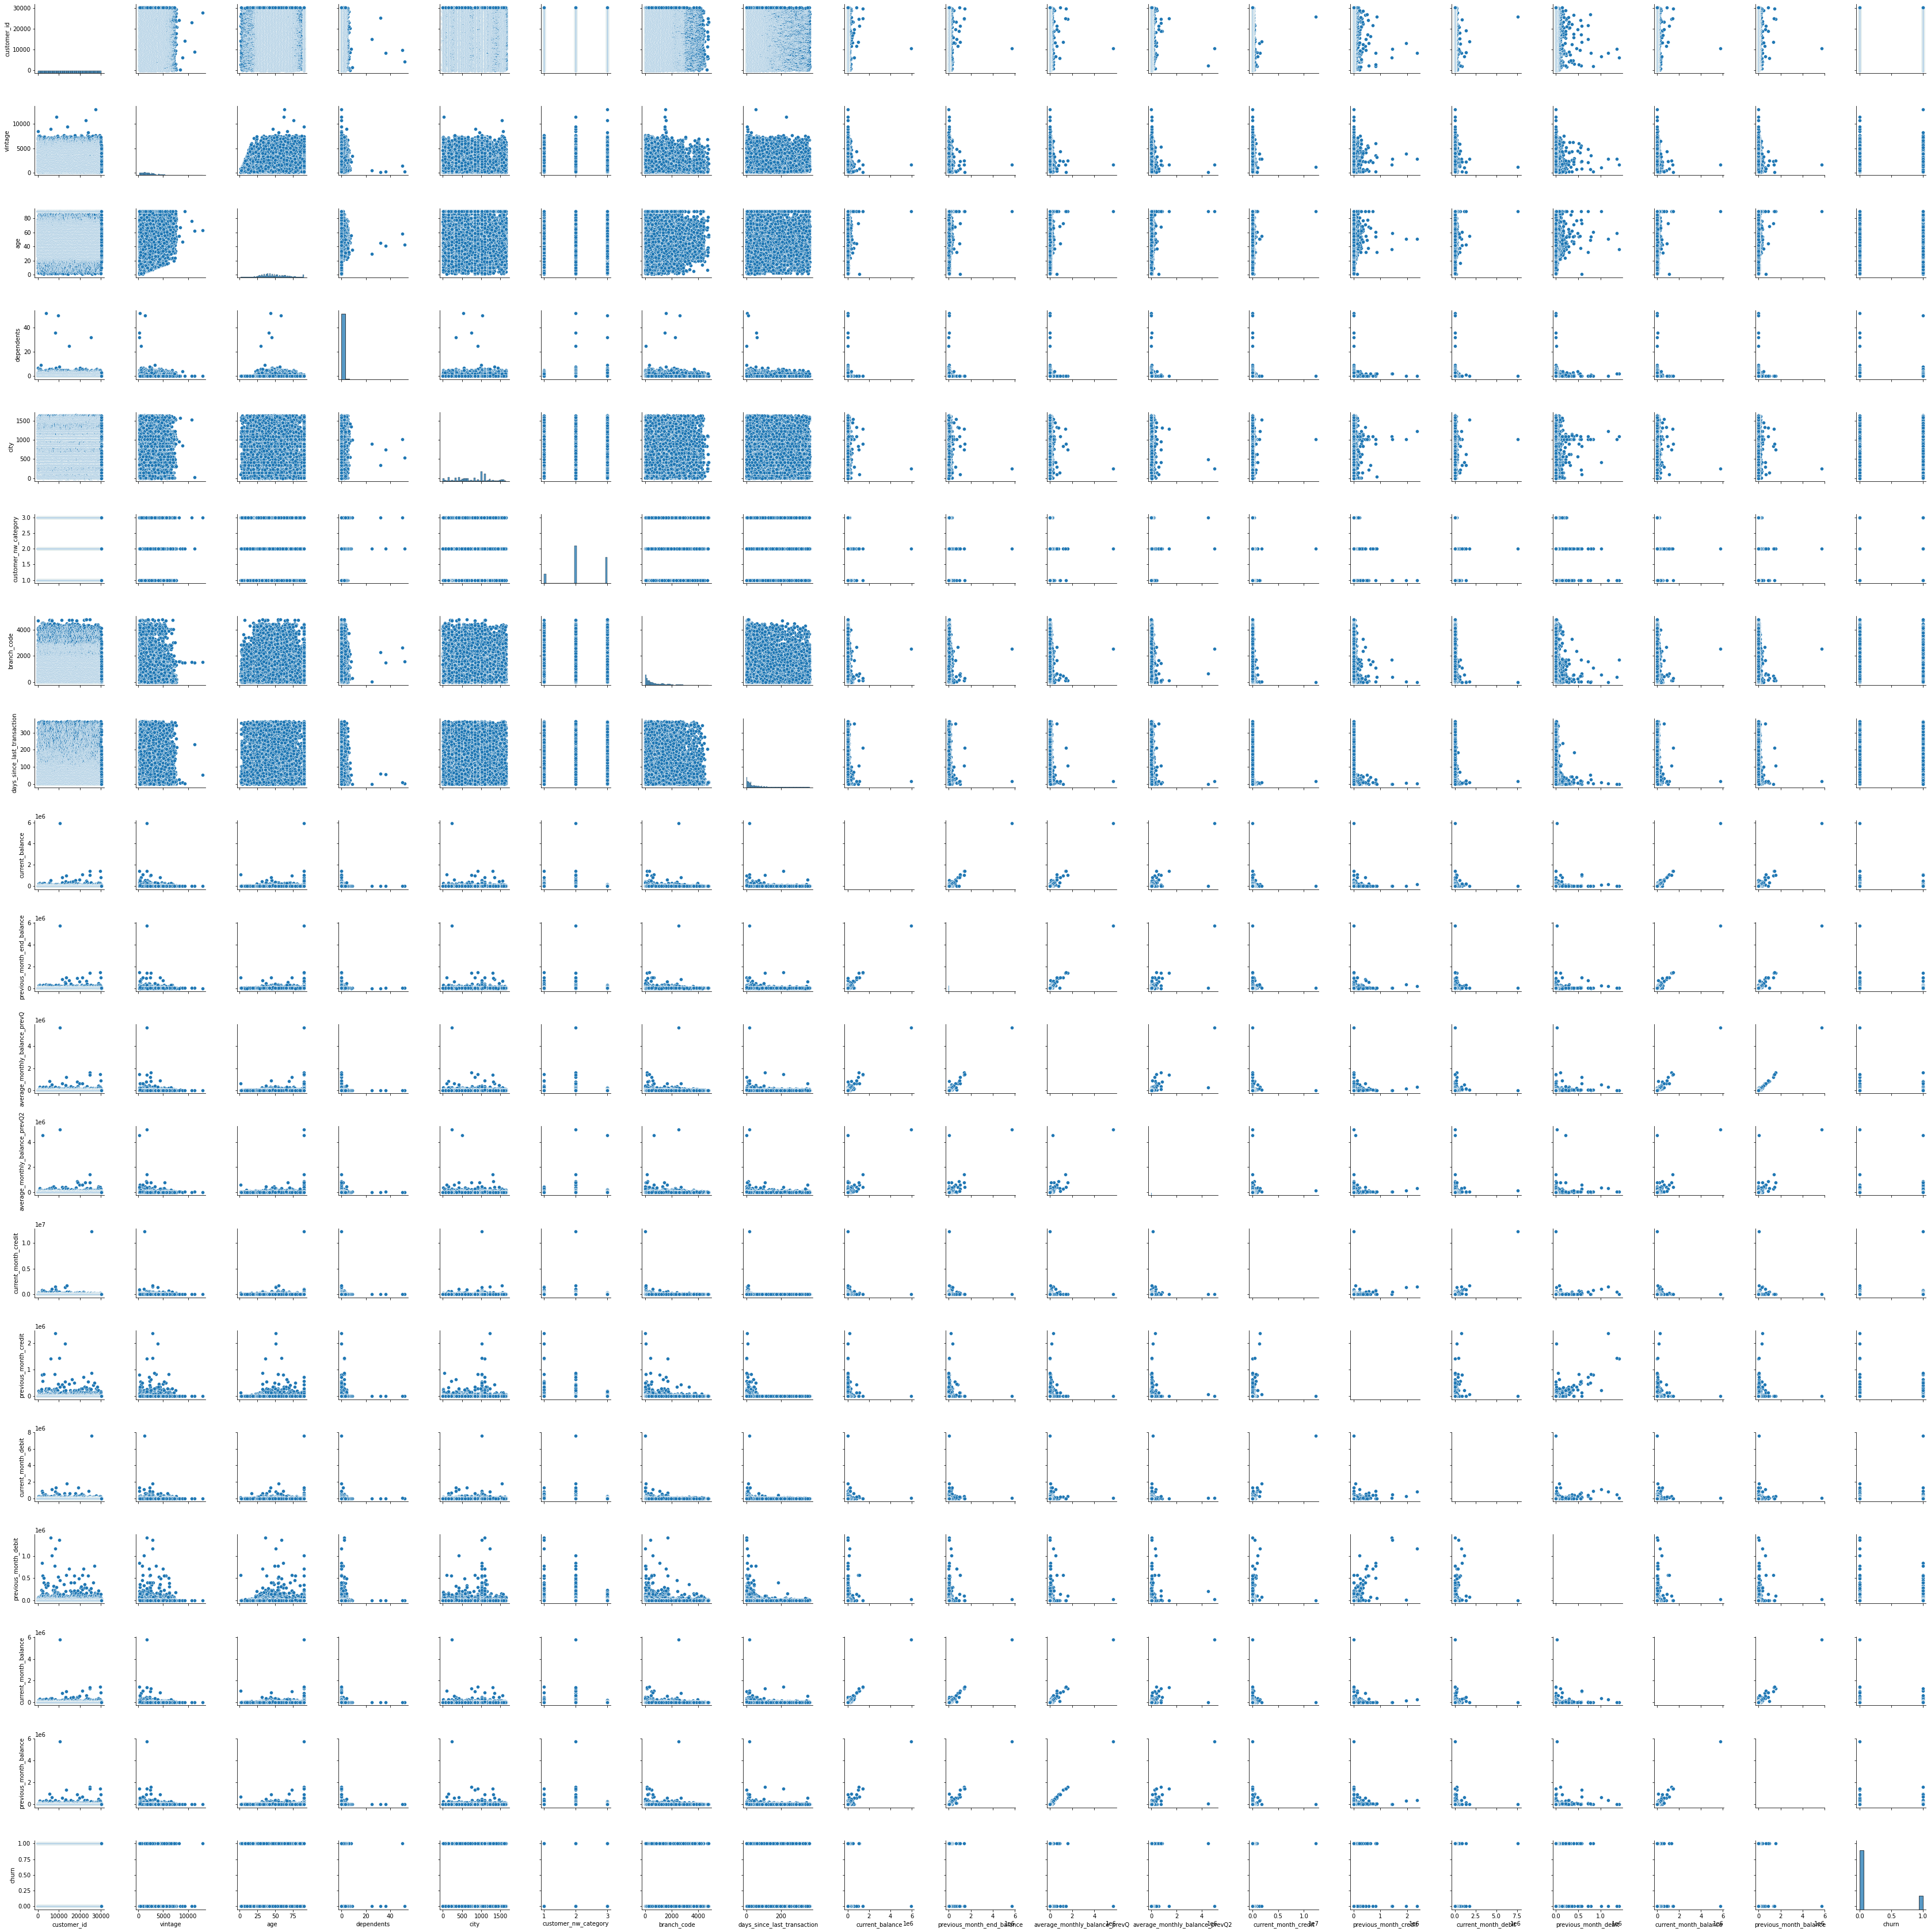

In [ ]:
sns.pairplot(df)

In [ ]:
pd.isnull(df).sum()
#df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

The result of this function shows that there are quite a few missing values in columns gender, dependents, city, days since last transaction and Percentage change in credits. Let us go through each of them 1 by 1 to find the appropriate missing value imputation strategy for each of them.

In [ ]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [ ]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)
df['gender'] = df['gender'].fillna(-1)

In [ ]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [ ]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [ ]:
df['dependents'] = df['dependents'].fillna(0)

df['occupation'] = df['occupation'].fillna('self_employed')

In [ ]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [ ]:
df['city'] = df['city'].fillna(1020)

In [ ]:
df['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [ ]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(0)

In [ ]:
#check
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# **Preprocessing**



In [ ]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [ ]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance','vintage','age','city','branch_code','days_since_last_transaction']
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [ ]:
scaled.head()

,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,vintage,age,city,branch_code,days_since_last_transaction
0,-0.341470,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207,0.524557,0.999320,-1.447539,-0.162728,1.923628
1,-0.341470,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680,-1.348017,-0.741648,0.515945,2.390191,-0.021957
2,-0.341470,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642,0.035810,-0.966520,-1.546622,-0.970575,-0.738433
3,-0.341470,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056,-1.228378,2.344995,0.515945,-0.355444,1.012470
4,1.172658,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732,0.147298,-0.348250,1.593088,-0.573823,-0.045799


In [ ]:
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")
df.head()

,customer_id,gender,dependents,occupation,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,vintage,age,city,branch_code,days_since_last_transaction
0,1,1.0,0.0,self_employed,0,0,0,0,1,0,-0.341470,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207,0.524557,0.999320,-1.447539,-0.162728,1.923628
1,2,1.0,0.0,self_employed,0,0,0,0,1,0,-0.341470,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680,-1.348017,-0.741648,0.515945,2.390191,-0.021957
2,4,1.0,0.0,salaried,0,0,0,1,0,0,-0.341470,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642,0.035810,-0.966520,-1.546622,-0.970575,-0.738433
3,5,-1.0,0.0,self_employed,1,0,0,0,1,0,-0.341470,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056,-1.228378,2.344995,0.515945,-0.355444,1.012470
4,6,1.0,2.0,self_employed,1,0,0,0,1,0,1.172658,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732,0.147298,-0.348250,1.593088,-0.573823,-0.045799


In [ ]:
y_all = df.churn
df = df.drop(['churn','customer_id','occupation'],axis = 1)
df.head()

,gender,dependents,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,vintage,age,city,branch_code,days_since_last_transaction
0,1.0,0.0,0,0,0,1,0,-0.341470,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207,0.524557,0.999320,-1.447539,-0.162728,1.923628
1,1.0,0.0,0,0,0,1,0,-0.341470,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680,-1.348017,-0.741648,0.515945,2.390191,-0.021957
2,1.0,0.0,0,0,1,0,0,-0.341470,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642,0.035810,-0.966520,-1.546622,-0.970575,-0.738433
3,-1.0,0.0,0,0,0,1,0,-0.341470,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056,-1.228378,2.344995,0.515945,-0.355444,1.012470
4,1.0,2.0,0,0,0,1,0,1.172658,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732,0.147298,-0.348250,1.593088,-0.573823,-0.045799


## **Model Building and Evaluation Metrics**
## Since this is a binary classification problem, we could use the following 2 popular metrics:

## Recall
## Area under the Receiver operating characteristic curve

## The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

## O**ur main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes**

### Without Columns selection

### Train Test Split to create a validation set

In [ ]:
# TEST 1 EN CONSERVANT TOUTES LES COLONNES (preprocessées)
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [ ]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

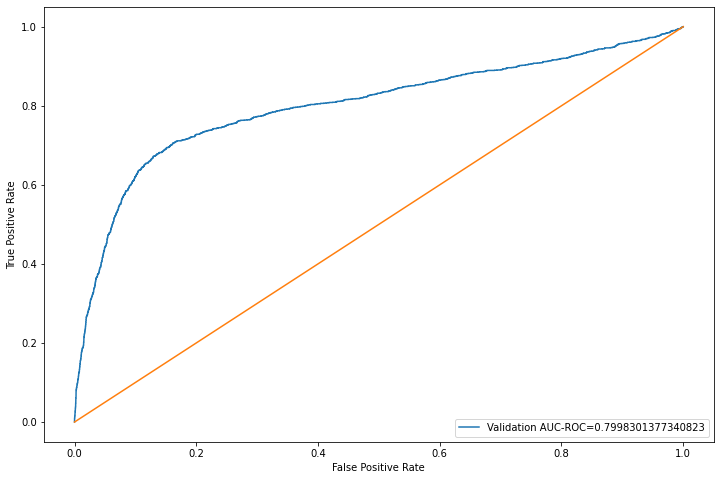

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
# Confusion Matrix
pred_val = model.predict(xtest)

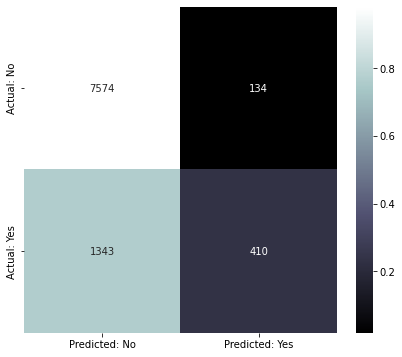

In [ ]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [ ]:
# Recall Score
recall_score(ytest,pred_val)

0.2338847689674843

In [ ]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [ ]:
#baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)
scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.8001362655431096, Recall Score: 0.2338, Precision Score: 0.7214 

2 of kfold 5
ROC AUC Score: 0.8046618024868977, Recall Score: 0.2310, Precision Score: 0.7594 

3 of kfold 5
ROC AUC Score: 0.7969243375610141, Recall Score: 0.2433, Precision Score: 0.7356 

4 of kfold 5
ROC AUC Score: 0.7945230373518228, Recall Score: 0.2348, Precision Score: 0.7395 

5 of kfold 5
ROC AUC Score: 0.793990808412383, Recall Score: 0.1987, Precision Score: 0.6808 


### Reverse Feature Elimination or Backward Selection



In [ ]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df, y_all)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [ ]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = df.columns
ranking_df['Rank'] = rfe.ranking_

In [ ]:
ranked = ranking_df.sort_values(by=['Rank'])

In [ ]:
ranked

,Feature_name,Rank
8,current_balance,1
11,average_monthly_balance_prevQ,2
2,occupation_company,3
10,average_monthly_balance_prevQ2,4
16,current_month_balance,5
17,previous_month_balance,6
14,current_month_debit,7
18,vintage,8
5,occupation_self_employed,9
15,previous_month_debit,10


In [ ]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.8021623676908848, Recall Score: 0.2376, Precision Score: 0.7310 

2 of kfold 5
ROC AUC Score: 0.8068780187031137, Recall Score: 0.2329, Precision Score: 0.7609 

3 of kfold 5
ROC AUC Score: 0.7984866936597945, Recall Score: 0.2395, Precision Score: 0.7283 

4 of kfold 5
ROC AUC Score: 0.7939044676806084, Recall Score: 0.2291, Precision Score: 0.7415 

5 of kfold 5
ROC AUC Score: 0.7953704099622403, Recall Score: 0.1968, Precision Score: 0.6765 


In [ ]:
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values, thres=0.14)


1 of kfold 5
ROC AUC Score: 0.8021623676908848, Recall Score: 0.8270, Precision Score: 0.2975 

2 of kfold 5
ROC AUC Score: 0.8068780187031137, Recall Score: 0.8260, Precision Score: 0.3002 

3 of kfold 5
ROC AUC Score: 0.7984866936597945, Recall Score: 0.8213, Precision Score: 0.2999 

4 of kfold 5
ROC AUC Score: 0.7939044676806084, Recall Score: 0.8042, Precision Score: 0.2926 

5 of kfold 5
ROC AUC Score: 0.7953704099622403, Recall Score: 0.8137, Precision Score: 0.3037 


[0.8021623676908848,
 0.8068780187031137,
 0.7984866936597945,
 0.7939044676806084,
 0.7953704099622403]

## Comparison of Different model fold wise

Let us visualise the cross validation scores for each fold for the following 3 models and observe differences:
* Baseline Model
* Model based on all features
* Model based on top 10 features obtained from RFE

In [ ]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

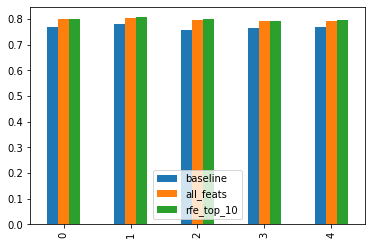

In [ ]:
results_df.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")

# WITH COLUMNS SELECTION ACCORDING EDA

In [ ]:
baseline_cols = ['current_month_credit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [ ]:
df_baseline = df[baseline_cols]

In [ ]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [ ]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

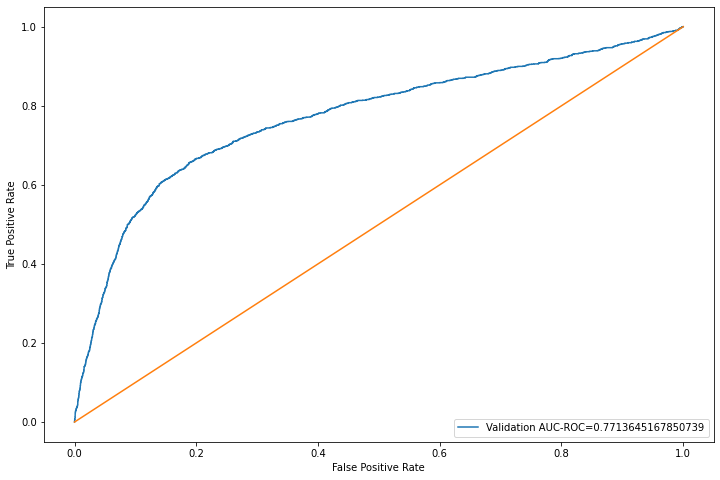

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

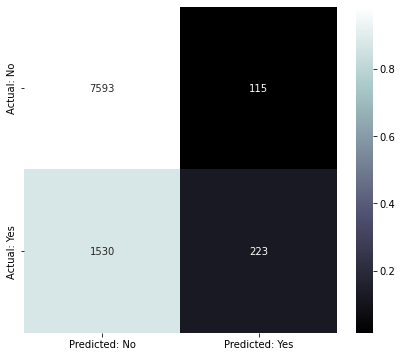

In [ ]:
# Confusion Matrix
pred_val = model.predict(xtest)

label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [ ]:
# Recall Score
recall_score(ytest,pred_val)

0.12721049629207073

In [ ]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [ ]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7668621929914705, Recall Score: 0.1188, Precision Score: 0.6219 

2 of kfold 5
ROC AUC Score: 0.7785325249203576, Recall Score: 0.1312, Precision Score: 0.7077 

3 of kfold 5
ROC AUC Score: 0.75426975475943, Recall Score: 0.1245, Precision Score: 0.6329 

4 of kfold 5
ROC AUC Score: 0.7624622567658241, Recall Score: 0.1312, Precision Score: 0.6699 

5 of kfold 5
ROC AUC Score: 0.7674638520136303, Recall Score: 0.1340, Precision Score: 0.6528 


In [ ]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.8001362655431096, Recall Score: 0.2338, Precision Score: 0.7214 

2 of kfold 5
ROC AUC Score: 0.8046618024868977, Recall Score: 0.2310, Precision Score: 0.7594 

3 of kfold 5
ROC AUC Score: 0.7969243375610141, Recall Score: 0.2433, Precision Score: 0.7356 

4 of kfold 5
ROC AUC Score: 0.7945230373518228, Recall Score: 0.2348, Precision Score: 0.7395 

5 of kfold 5
ROC AUC Score: 0.793990808412383, Recall Score: 0.1987, Precision Score: 0.6808 


In [ ]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df, y_all)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [ ]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = df.columns
ranking_df['Rank'] = rfe.ranking_

ranked = ranking_df.sort_values(by=['Rank'])
ranked


,Feature_name,Rank
8,current_balance,1
11,average_monthly_balance_prevQ,2
2,occupation_company,3
10,average_monthly_balance_prevQ2,4
16,current_month_balance,5
17,previous_month_balance,6
14,current_month_debit,7
18,vintage,8
5,occupation_self_employed,9
15,previous_month_debit,10


In [ ]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.8021623676908848, Recall Score: 0.2376, Precision Score: 0.7310 

2 of kfold 5
ROC AUC Score: 0.8068780187031137, Recall Score: 0.2329, Precision Score: 0.7609 

3 of kfold 5
ROC AUC Score: 0.7984866936597945, Recall Score: 0.2395, Precision Score: 0.7283 

4 of kfold 5
ROC AUC Score: 0.7939044676806084, Recall Score: 0.2291, Precision Score: 0.7415 

5 of kfold 5
ROC AUC Score: 0.7953704099622403, Recall Score: 0.1968, Precision Score: 0.6765 


In [ ]:
rfe_top_5_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:5].values)


1 of kfold 5
ROC AUC Score: 0.7955118692837324, Recall Score: 0.2224, Precision Score: 0.7597 

2 of kfold 5
ROC AUC Score: 0.8013766313842359, Recall Score: 0.2215, Precision Score: 0.8034 

3 of kfold 5
ROC AUC Score: 0.7933915626192324, Recall Score: 0.2091, Precision Score: 0.7612 

4 of kfold 5
ROC AUC Score: 0.7914530076177193, Recall Score: 0.2158, Precision Score: 0.7517 

5 of kfold 5
ROC AUC Score: 0.7917329982764745, Recall Score: 0.1920, Precision Score: 0.7189 


In [ ]:
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:5].values, thres=0.14)


1 of kfold 5
ROC AUC Score: 0.7955118692837324, Recall Score: 0.8346, Precision Score: 0.2594 

2 of kfold 5
ROC AUC Score: 0.8013766313842359, Recall Score: 0.8403, Precision Score: 0.2679 

3 of kfold 5
ROC AUC Score: 0.7933915626192324, Recall Score: 0.8260, Precision Score: 0.2676 

4 of kfold 5
ROC AUC Score: 0.7914530076177193, Recall Score: 0.8260, Precision Score: 0.2678 

5 of kfold 5
ROC AUC Score: 0.7917329982764745, Recall Score: 0.8203, Precision Score: 0.2691 


[0.7955118692837324,
 0.8013766313842359,
 0.7933915626192324,
 0.7914530076177193,
 0.7917329982764745]

In [ ]:
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:5].values, thres=0.1)


1 of kfold 5
ROC AUC Score: 0.7955118692837324, Recall Score: 0.9144, Precision Score: 0.2123 

2 of kfold 5
ROC AUC Score: 0.8013766313842359, Recall Score: 0.8945, Precision Score: 0.2096 

3 of kfold 5
ROC AUC Score: 0.7933915626192324, Recall Score: 0.8983, Precision Score: 0.2119 

4 of kfold 5
ROC AUC Score: 0.7914530076177193, Recall Score: 0.8935, Precision Score: 0.2139 

5 of kfold 5
ROC AUC Score: 0.7917329982764745, Recall Score: 0.9030, Precision Score: 0.2138 


[0.7955118692837324,
 0.8013766313842359,
 0.7933915626192324,
 0.7914530076177193,
 0.7917329982764745]

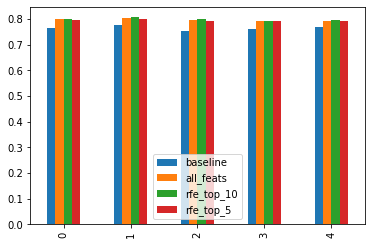

In [ ]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores, 'rfe_top_5': rfe_top_5_scores})

results_df.plot(y=["baseline", "all_feats", "rfe_top_10","rfe_top_5"], kind="bar")